# Análisis de electrocardiograma basado en PCA y Máquinas De Soporte Vecotorial

## Introducción

Las enfermedades cardiovasculares es una de las principales causas de muertes alrededor del mundo, afortunadamente existe un instrumento llamado electrocardiograma (ECG) que permiten el análisis y monitoreo para prevenir estas enfermedades. Es por ello que en este articulo se propone desarrollar un algoritmo para reconocer y clasificar el latido normal, el latido del bloqueo de rama izquierda, el latido del bloque de rama derecha y la contracción ventricular prematura (PVC) haciendo uso del conjunto de datos de datos (**MIT-BIH**) de señales de un electrocardiograma.

El ECG consta de 3 ondas básicas Despolarización auricular(**P**), la despolarización ventricular(**QRS**) y la repolarización ventricular (**onda T**); correspondientes al campo lejano inducido por fenómenos eléctricos en la superficie caridaca. Cuando existe alguna enfermedad cardiovascular, se debe a una mal funcionamiento de una o varias partes del corazón, de modo que esto se reflejará en el ECG.


![title](ondas.png)

## Análisis de Componentes Principales (PCA)
El analizador principal de componentes es una técnica para reducir la complejidad de un datase, haciendo uso de eigenvectors y eigenvalores, siendo los eigenvectores un subespacio del dataset y los eigenvalues la significancia de cada uno de ellos. De esta manera, será posible seleccionar los subespacios más significativos logrando reducir la dimensionalidad.

## Máquinas de Soporte Vectorial
En este articulo se bosqueja de forma muy general este algoritmo y su motivación.
Se parte del caso simple de dos clases linealmente separables. Suponemos que tenemos un conjunto de datos de ejemplos etiquetados  y deseamos determinar, entre el número infinito de clasificadores lineales que separan los datos o que hace posible separar las clases tendiendo al menor error de generalización por medio de un hiperplano.

## Resultados experimentales
La base de datos utilizada fue MIT-BIH Arrhythmia Database, la cual contiene 48 extractos de media hora de grabaciones de ECG ambulatorias de dos canales.
En nuestro experimento, construimos una nueva base de datos a partir de la base de datos original. Nuestra intención es analizar el ECG en un solo latido. Las características de nuestra base de datos se enumeran a continuación:
#### A. Database
1. Utilizamos solo una señal de cable (cable de extremidad II o MLII) para definir nuestros datos
2. Cada dato en nuestro conjunto de datos experimentales representa uno porque: un solo latido. Para obtener los datos, las señales se extraen con 250 muestras (correspondientes a aproximadamente 700 ms), donde la onda R fue la muestra número 100.
3. Solo nos enfocamos en 4 tipos de señales: Normal, latido de bloqueo de rama izquierda, latido de bloqueo de rama derecha, contracción ventricular prematura (PVC)
4. Usamos 2/3 del conjunto de datos como conjunto de entrenamiento, y utilizamos el 1/3 restante como prueba.

#### B. Procesamiento de datos con PCA
Existía una gran cantidad de datos que nos son eficientes para el modelo, y que por lo tanto generan ruido al SVM. Así que se aplicó PCA a la base de datos. Se observó que con tan sólo 10 componentes principales ya era posible representar el 97.66% de la base de datos original, y con 20 componentes principales se representa el 99.52% de la base de datos original.

#### C. Clasificación con SVM
Una vez que se extraen los componentes principales y se decide el subespacio, se proyectan los datos en ese subespacio y así reducir la dimensionalidad de nuestro problema de clasificación. Primero se proyecta dos tipos de datos en el espacio generado por los 3 componentes más significativos, dando una idea de cómo se distribuyen los datos en el subespacio.

## Conclusiones
Es muy importante identificar la arritmia y proporcionar un método de pre-diagnóstico de máquina, ya que como se observa en este articulo da la información suficiente para determinar y predecir este tipo de problemas.

# Procesamiento de los datos

**Seleccionar** = L, R, V, N

**Nota:** El Archivo 102, 104 se cambió la columna 'V5' por 'MLII'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
%%time 
signals = ['L', 'R', 'V', 'N']
name_pulses = ['c'+str(i) for i in range(250)] + ["Type", "Sample"]
file_numbers = [ 100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,
                201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234 ]

CPU times: user 53 µs, sys: 8 µs, total: 61 µs
Wall time: 90.1 µs


In [4]:
%%time 
pulsos = []
for file_n in file_numbers:
    df =  pd.read_csv("mitbih_database/"+str(file_n)+".csv", usecols = ['sample #', 'MLII'])
    df.set_index("sample #", inplace = True)

    dfann = pd.read_csv('mitbih_database/'+str(file_n)+'annotations.txt', usecols = ['Sample', '#'], delim_whitespace=True)
    dfann.rename(columns = {'Sample': 'sample #', '#': 'Type'}, inplace = True)
    dfann = dfann[dfann['Type'].isin(signals)]
    dfann.set_index("sample #", inplace = True)


    for val in dfann.index.values:
        if(val >= 99):
            df_completed = pulsos.append(list(df.iloc[val-99: val+151]['MLII']) + [dfann.loc[val]['Type'], file_n])

CPU times: user 59.6 s, sys: 1.52 s, total: 1min 1s
Wall time: 32.9 s


In [5]:
df_completed = pd.DataFrame(pulsos, columns = name_pulses) 

In [6]:
df_completed[df_completed['Type'] != 'N']

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c242,c243,c244,c245,c246,c247,c248,c249,Type,Sample
1878,932,930,929,926,926,927,930,928,925,925,...,970,968.0,969.0,969.0,972.0,972.0,969.0,968.0,V,100.0
2237,932,939,934,929,925,926,928,929,930,929,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4114,945,949,951,956,956,962,968,971,972,972,...,986,984.0,983.0,983.0,985.0,986.0,985.0,984.0,V,102.0
4196,938,941,945,947,951,953,954,954,957,961,...,946,945.0,945.0,948.0,946.0,942.0,943.0,945.0,V,102.0
4197,998,1000,999,1000,998,1001,1002,1003,1006,1005,...,974,973.0,973.0,974.0,975.0,974.0,972.0,969.0,V,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92416,911,912,910,906,906,905,902,903,901,904,...,970,970.0,966.0,965.0,963.0,964.0,962.0,963.0,V,233.0
92419,974,977,979,978,975,976,973,971,970,972,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
93950,1008,1010,1012,1013,1010,1009,1009,1010,1011,1013,...,994,991.0,991.0,990.0,990.0,993.0,994.0,995.0,V,234.0
94350,976,977,980,977,978,981,982,981,983,980,...,996,996.0,993.0,994.0,991.0,990.0,993.0,991.0,V,234.0


In [7]:
df_completed['Type'].value_counts()

N    73537
L     8072
V     7072
R     6417
Name: Type, dtype: int64

## Valores nulos
En la función realizada anteriormente, se hizo un procesamiento para organizar los datos de forma que el algoritmo seleccionado aprendiera fácilemnte, sin embargo, el umbral superior no se controló completamente, de manera que se esperaban algunos valores nulos, los cuales se eliminarán a continuación.

In [8]:
df_completed.drop(df_completed[df_completed['Type'].isnull()].index, inplace=True)

In [21]:
df_completed.describe().iloc[0].unique()  # Se confirma que ya no hay valores nulos y que todos tienen la misma dimensión

array([95098.])

## Explorando algunas muestras de los diferentes tipos

In [9]:
num_pts = [i for i in range(250)]

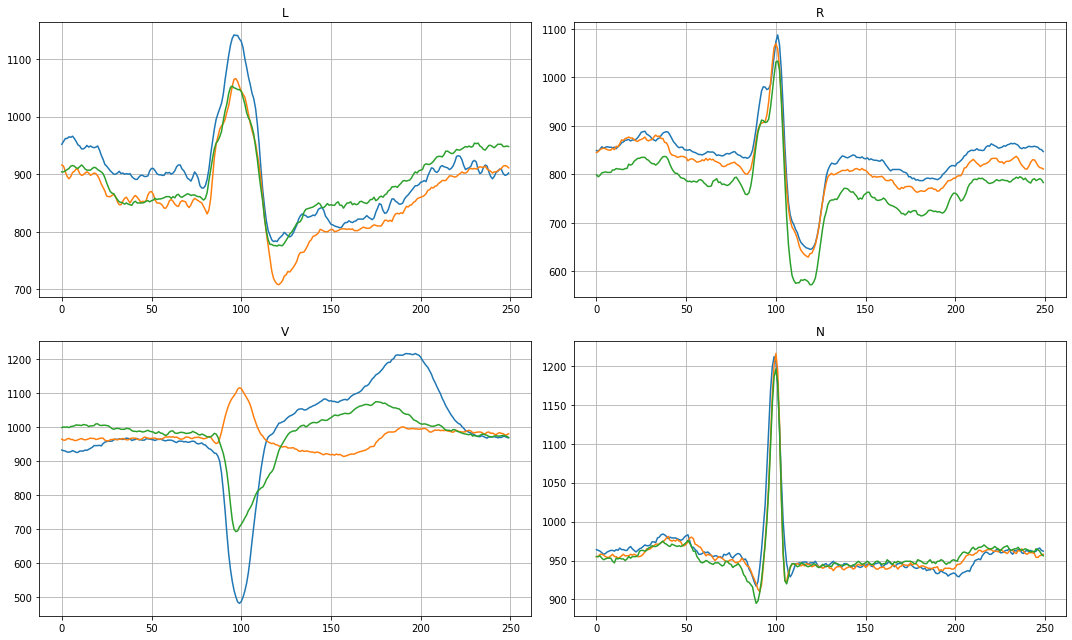

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

axs[0][0].plot(num_pts, df_completed.iloc[12855][0:250])
axs[0][0].plot(num_pts, df_completed.iloc[12856][0:250])
axs[0][0].plot(num_pts, df_completed.iloc[12857][0:250])
axs[0][0].set(title='L')
axs[0][0].grid()

axs[0][1].plot(num_pts, df_completed.iloc[29596][0:250])
axs[0][1].plot(num_pts, df_completed.iloc[29597][0:250])
axs[0][1].plot(num_pts, df_completed.iloc[29598][0:250])
axs[0][1].set(title='R')
axs[0][1].grid()

# log x and y axis
axs[1][0].plot(num_pts, df_completed.iloc[1878][0:250])
axs[1][0].plot(num_pts, df_completed.iloc[4114][0:250])
axs[1][0].plot(num_pts, df_completed.iloc[4196][0:250])
axs[1][0].set(title='V')
axs[1][0].grid()


axs[1][1].set(title='N')
axs[1][1].plot(num_pts, df_completed.iloc[0][0:250])
axs[1][1].plot(num_pts, df_completed.iloc[1][0:250])
axs[1][1].plot(num_pts, df_completed.iloc[2][0:250])
axs[1][1].grid()

fig.tight_layout()
plt.show()

In [24]:
df_completeddf_completed.to_csv (r'cleaned_electrocardiograma_dataset', index = None, header=True)